Estimated number of clusters: 3
Estimated number of noise points: 1
Homogeneity: 1.000
Completeness: 0.989
V-measure: 0.994
Adjusted Rand Index: 0.997
Adjusted Mutual Information: 0.994
Silhouette Coefficient: 0.656


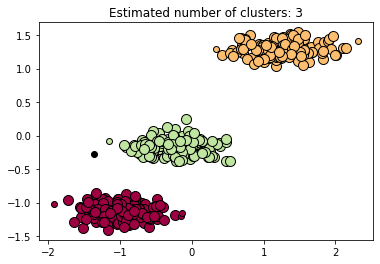

In [49]:


import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## n_samples say how many numbers exist so we can show it bigger if we want
## cluster standard deviation how much sparks these data points .
## Centers says we determine some central points and we reshape our data according to these points so it is 
##important thing to consider.Cluster numbers are changed when it is changed.This means it is distributed more widely.

# Generate sample data
centers = [[-0, 3],[2,9],[-1,-1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.45,
                            random_state=42)
##Standard scaling for convenience
X = StandardScaler().fit_transform(X)

# Compute DBSCAN
## epsillon value says how much distance between core and border points.

density = DBSCAN(eps=0.35, min_samples=11).fit(X)
core_samples_mask = np.zeros_like(density.labels_, dtype=bool)
core_samples_mask[density.core_sample_indices_] = True
labels = density.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    
## Markerfacecolor shows how big our colors
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()